<a href="https://colab.research.google.com/github/alda1rx/Tareas_EstadisticaAplicada_21/blob/main/LAHM_1616940_EstadisticaAplicadaG51_actividad7_mar2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

### a) Estimemos un MA(2)

Comenzamos con la matricula 1616940 
con los ultimos dos digitos 4 y 0
por tanto, trabajaremos con la sig ec:

$Y_t = 0.4 \varepsilon_{t-1} + 0 \varepsilon_{t-2}$

Reescribiendo, tenemos:

$Y_t = 0.4 \varepsilon_{t-1}$

In [17]:
#en python tenemos que modelarlo como un proceso arma sin la parte AR(p)
np.random.seed(29)
ma2 = np.array([0, 0.4, 0])
ar2 = np.array([1])
proceso_MA2 = ArmaProcess(ar2, ma2).generate_sample(1000)

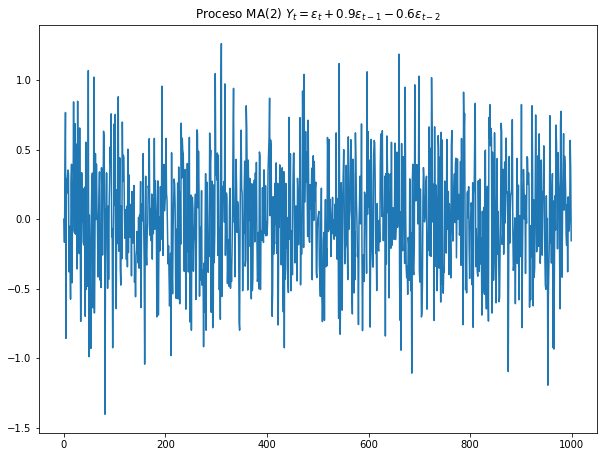

In [18]:
#graficamos
plt.plot(proceso_MA2)
plt.title(r'Proceso MA(2) $Y_t = \varepsilon_t + 0.9 \varepsilon_{t-1}- 0.6 \varepsilon_{t-2}$')
plt.show()

In [35]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(proceso_MA2)

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.000000


In [37]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


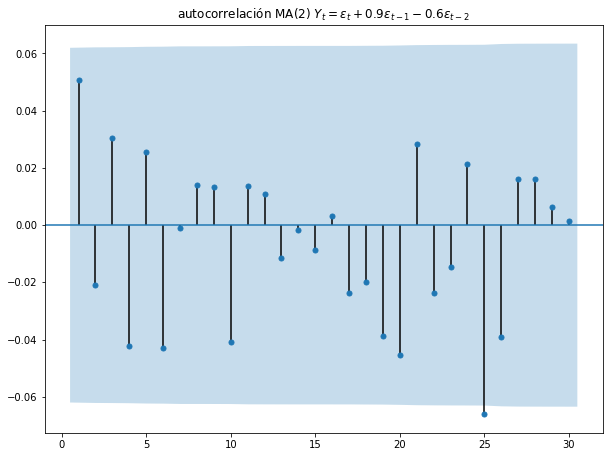

In [19]:
#graficamos función de autocorrelación
plot_acf(proceso_MA2, zero=False, lags=30)
plt.title(r'autocorrelación MA(2) $Y_t = \varepsilon_t + 0.9 \varepsilon_{t-1}- 0.6 \varepsilon_{t-2}$ ')
plt.show()

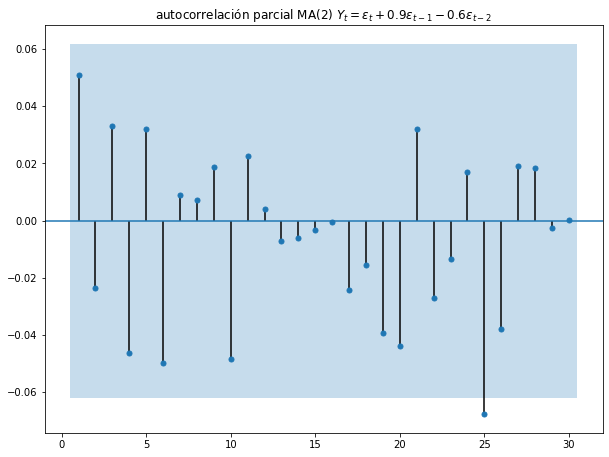

In [20]:
#graficamos función de autocorrelación parcial 
plot_pacf(proceso_MA2, zero=False, lags=30)
plt.title(r'autocorrelación parcial MA(2) $Y_t = \varepsilon_t + 0.9 \varepsilon_{t-1}- 0.6 \varepsilon_{t-2}$')
plt.show()  

### b) Estimemos un AR(2)

Comenzamos con la matricula 1616940 
con los siguientes dos digitos 9 y 6
por tanto, trabajaremos con la sig ec:

$Y_t = 0.9 Y_{t-1}+0.6 Y_{t-2}+\varepsilon_t$

In [25]:
np.random.seed(12)
ma2 = np.array([1])
ar2 = np.array([1, 0.9, 0.6])
proceso_AR2 = ArmaProcess(ar2, ma2).generate_sample(1000)

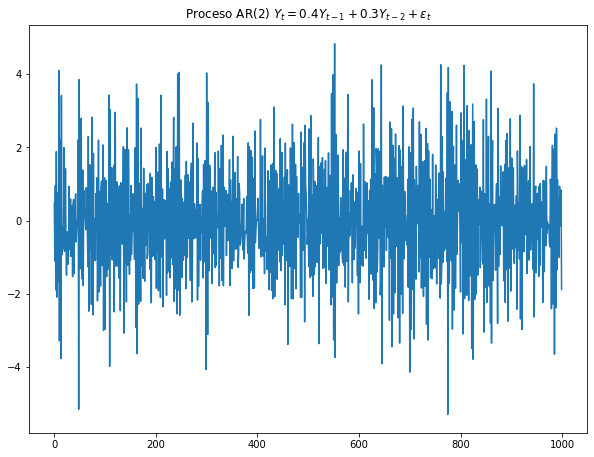

In [14]:
#graficamos
plt.plot(proceso_AR2)
plt.title(r'Proceso AR(2) $Y_t = 0.4 Y_{t-1}+0.3 Y_{t-2}+\varepsilon_t$')
plt.show()

In [42]:
#hacemos la prueba de dickey fuller aumentada ADF
adf_AR = adfuller(proceso_AR2)

#presentamos el p-value
print('p-value: %f' % adf_AR[1])

p-value: 0.000000


In [44]:
if adf_AR[1] < 0.05:
    
    print(f'con un un p-value={adf_AR[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf_AR[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


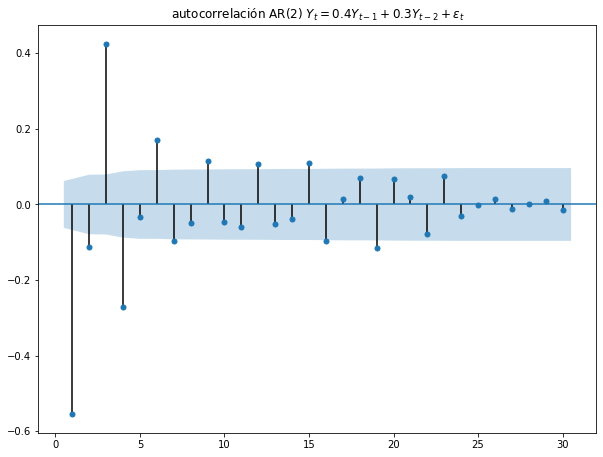

In [15]:
#graficamos función de autocorrelación
plot_acf(proceso_AR2, zero=False, lags=30)
plt.title(r'autocorrelación AR(2) $Y_t = 0.4 Y_{t-1}+0.3 Y_{t-2}+\varepsilon_t$')
plt.show()

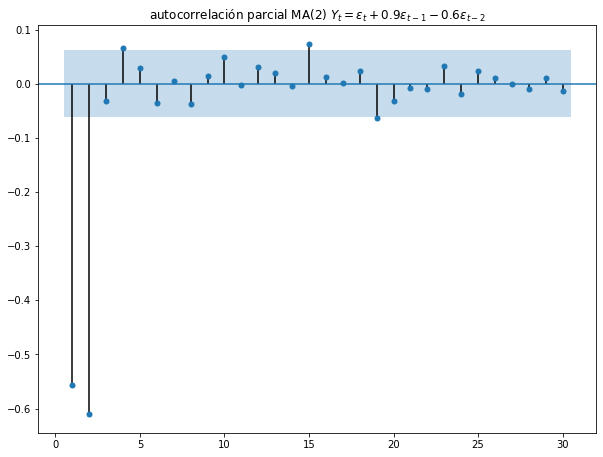

In [16]:
#graficamos función de autocorrelación parcial 
plot_pacf(proceso_AR2, zero=False, lags=30)
plt.title(r'autocorrelación parcial MA(2) $Y_t = \varepsilon_t + 0.9 \varepsilon_{t-1}- 0.6 \varepsilon_{t-2}$')
plt.show()  

## c) Proceso Autorregresivo ARMA(p,q)


$Y_t = 0.4 \varepsilon_{t-1} + 0.9 Y_{t-1}+0.6 Y_{t-2}+\varepsilon_t$


In [45]:
#en python tenemos que modelarlo como un proceso arma
np.random.seed(39)
ma1 = np.array([0, 0.4, 0])
ar1 = np.array([1, 0.9, 0.6])
proceso_ARMA2 = ArmaProcess(ar1, ma1).generate_sample(1000)

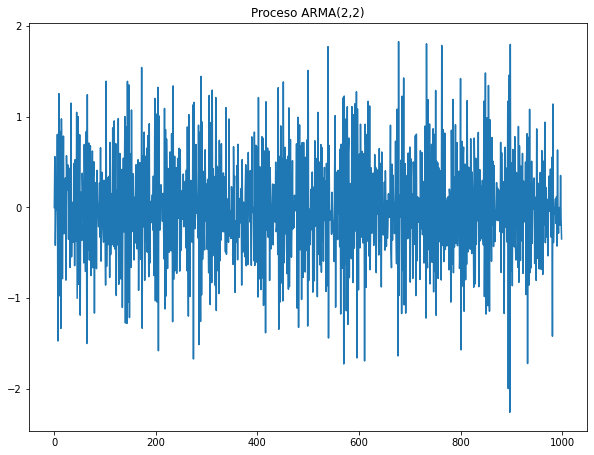

In [46]:
#graficamos
plt.plot(proceso_ARMA2)
plt.title(r'Proceso ARMA(2,2)')
plt.show()

In [47]:
#hacemos la prueba de dickey fuller aumentada ADF
adf_ARMA = adfuller(proceso_ARMA2)

#presentamos el p-value
print('p-value: %f' % adf_AR[1])

p-value: 0.000000


In [48]:
if adf_ARMA[1] < 0.05:
    
    print(f'con un un p-value={adf_AR[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf_AR[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


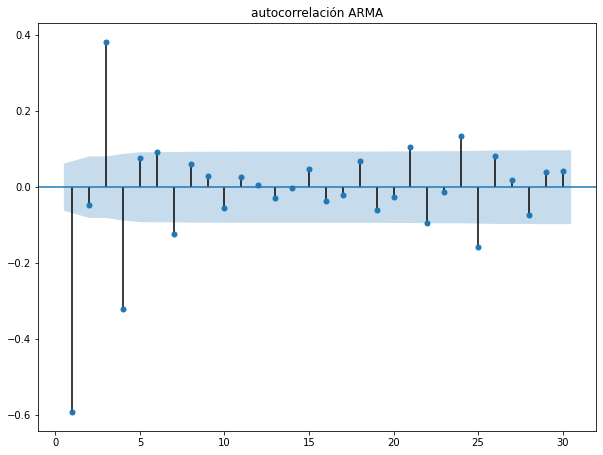

In [49]:
#graficamos función de autocorrelación
plot_acf(proceso_ARMA2, zero=False, lags=30)
plt.title(r'autocorrelación ARMA')
plt.show()

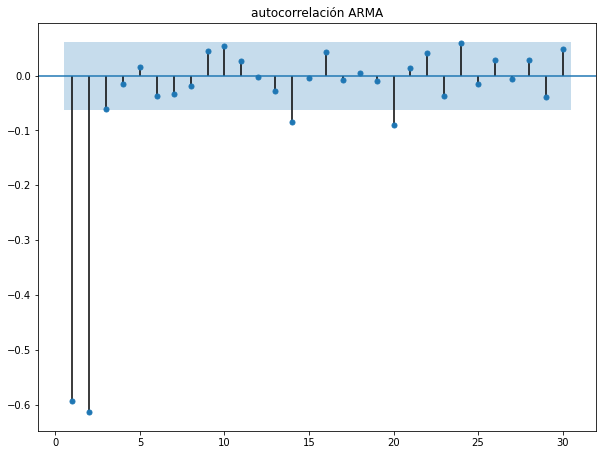

In [34]:
#graficamos función de autocorrelación parcial
plot_pacf(proceso_ARMA2, zero=False, lags=30)
plt.title(r'autocorrelación ARMA')
plt.show()